# Installing and Using `nbdime`

`n`ote`b`ook `di`ff and `me`rge.

### Table of Contents:

### 0) [Introduction](#intro)

#### [Installation](#install)

### 1) [Usage without Git](#without_git)

#### [Web based diffs: improved visualization](#web_based_diffs)


### 2) [Usage with Git](#with_git)

#### [Comparing notebooks between different branches](#diff_branches)

#### [Comparing individual commits](#compare_commits)

#### [Using the `nbdime` Jupyter extension](#jupyter_extension)

#### [Merging notebooks](#Merging_notebooks)

#### [Resolving conflicts in the web GUI](#resolve_conflicts)

### [References](#refs)
_____________________

<a id='intro'></a>

## Introduction

In this notebook-tutorial, we will cover **bit by bit, with no gaps at all**, all the necessary steps that you need to follow in order to **practically** and **confidently** use `nbdime` in your daily work.

**DISCLAIMER**: The main goal of this notebook is to help you get your job done, and **not to bore you** with unnecessary detail about non-fundamental features. If it looks long, it's because it's also **crystal-clear**, so you come out of the reading with no gaps in your understanding.

**Pre-requisites**: None. But probably a basic knowledge of Git will help.

And here we start!

`nbdime` is a tool that allows you to diff and merge notebooks with the same ease as you do that with scripts. <br>
It is *notebook-aware*, which means that it *understands* the structure of the JSON that a notebook actually is behind de scenes, so that the user gets a **meaningful** result when performing diffs, merges, or actions with Git. <br>
It also integrates well with Git (though not with GitHub), so that things like `git diff` or `git merge` with notebooks behave as one would expect them to behave.

* Pros: Free, notebook-aware diffs and merges, not just JSON diffs, and integrated with Git locally.
* Cons: Does not integrate with GitHub, so can't visualize diffs in a pull request

<a id='install'></a>

### We install the package:

In [2]:
! pip install nbdime

    100% |████████████████████████████████| 5.3MB 6.9MB/s eta 0:00:01
    100% |████████████████████████████████| 460kB 9.9MB/s eta 0:00:01
    100% |████████████████████████████████| 71kB 30.4MB/s ta 0:00:01


In [8]:
! ls -l *.ipynb

-rw-r--r-- 1 cjimenez cjimenez  10142 may  5 09:27 20200505_CJU_nbdime-installation-usage.ipynb
-rw-r--r-- 1 cjimenez cjimenez  10097 may  5 09:30 build_sample_datasets_from_shows-Copy1.ipynb
-rw-rw-r-- 1 cjimenez cjimenez   9920 may  2 22:09 build_sample_datasets_from_shows.ipynb
-rw-r--r-- 1 cjimenez cjimenez 352103 may  2 13:38 ip_forecast_process-high-volume.ipynb
-rw-rw-r-- 1 cjimenez cjimenez 141796 may  2 13:15 ip_forecast_tests.ipynb


<a id='without_git'></a>

## Usage without Git

We can show the diffs between 2 notebooks in the terminal by doing:

```bash
nbdiff NB1.ipynb NB2.ipynb
```

In [9]:
! nbdiff build_sample_datasets_from_shows.ipynb build_sample_datasets_from_shows-Copy1.ipynb

nbdiff build_sample_datasets_from_shows.ipynb build_sample_datasets_from_shows-Copy1.ipynb
--- build_sample_datasets_from_shows.ipynb  2020-05-02 22:09:44.354824
+++ build_sample_datasets_from_shows-Copy1.ipynb  2020-05-05 09:30:04.547899
## inserted before /cells/2:
+  markdown cell:
+    source:
+      New markdown cell <br>
+      20200505_CJU_nbdime-installation-usage

## replaced /cells/3/execution_count:
-  6
+  1

## modified /cells/3/source:
-  from pyspark.sql import functions as F, types as T
+  from pyspark.sql import functions as F, types as T, DataFrame, Window, Row

## modified /cells/4/source:
@@ -1,6 +1,6 @@
 # sales_user.sales_aggregated_supply
 
-schema = "werks,matnr,id_promo,id_mechanics,start_date_promo,end_date_promo,matnr_similar,werks_similar,id_similar_promo,id_similar_mechanics,start_date_similar_promo,end_date_similar_promo"
+schema = "werks,matrn,id_promo,id_mechanics,start_date_promo,end_date_promo,matnr_similar,werks_similar,id_similar_promo,id_similar_mec

<a id='web_based_diffs'></a>

### Web based diffs: improved visualization

However, if we want more detailed diffs, like precise highlighting of the parts that actually have changed, we can use `nbdiff-web` instead of just `nbdiff` and see a more natural side-by-side diff with color highlighting:
```bash
nbdiff-web NB1.ipynb NB2.ipynb
```

In [13]:
! nbdiff-web build_sample_datasets_from_shows.ipynb build_sample_datasets_from_shows-Copy1.ipynb

# When you are done reviewing you have to stop the kernel (in notebook) or do "Ctrl+C" in terminal.

You will see a new tab in your web-browser showing something like this:

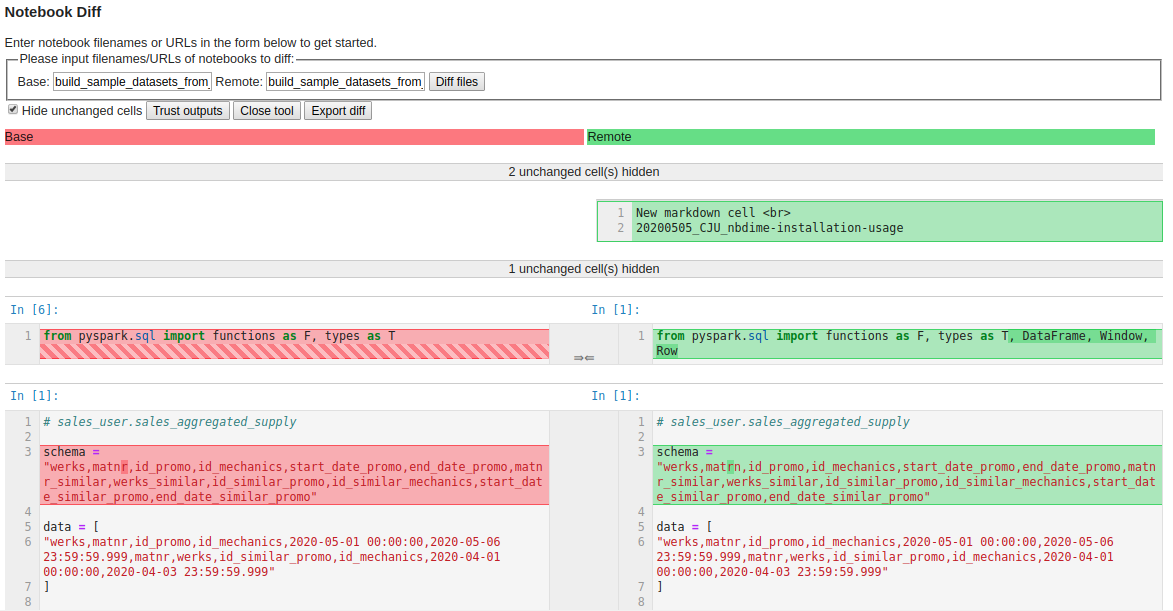

-----------
<a id='with_git'></a>

## Usage with Git

Next, assuming you want to use Git with Notebooks, you have to allow `nbdime` to handle notebooks in liu of Git itself, which does not do a very good job with notebooks by default.

```bash
nbdime config-git --enable --global
```
From this point, `nbdime` will deal with notebooks when Git is invoked.

First we see that a notebook has been modified:

In [18]:
! git status

On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   build_sample_datasets_from_shows-Copy1.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	20200505_CJU_nbdime-installation-usage.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


Git will let `nbdime` display the diffs its way, and when you do `git diff` or `git merge` with notebooks, you should see a nice diff view, like this:

In [20]:
! git diff

nbdiff /tmp/IP2K5v_build_sample_datasets_from_shows-Copy1.ipynb build_sample_datasets_from_shows-Copy1.ipynb
--- /tmp/IP2K5v_build_sample_datasets_from_shows-Copy1.ipynb  2020-05-05 10:09:44.320960
+++ build_sample_datasets_from_shows-Copy1.ipynb  2020-05-05 10:09:01.244731
## replaced /cells/4/execution_count:
-  1
+  3

## modified /cells/4/source:
-  from pyspark.sql import functions as F, types as T, DataFrame, Row
+  from pyspark.sql import functions as F, types as T, DataFrame, Row, Window

## modified /cells/6/source:
@@ -3,7 +3,7 @@
 schema = "werks,matrn,id_promo,id_mechanics,start_date_promo,end_date_promo,matnr_similar,werks_similar,id_similar_promo,id_similar_mechanics,start_date_similar_promo,end_date_similar_promo"
 
 data = [
-"werks,matnr,id_promo,id_mechanics,2020-05-01 00:00:00,2020-05-06 23:59:59.999,matnr,werks,id_similar_promo,id_mechanics,2020-04-01 00:00:00,2020-04-03 23:59:59.999"
+"werks,matnr,id_promo,id_mechanics,2020-05-01 00:00:00,2020-05-14 23:59:59.999,ma

Sometimes it may be hard to spot the exact change, like what changes inside `data = [..]` exactly, but that's a huge improvement over how Git used to display changes in NBs.

<a id='diff_branches'></a>

### Comparing notebooks between different branches

#### View in terminal

If you want to compare how a notebook named `notebook.ipynb` differs from one branch, `master`, to another, `feature_1`, you can do:
```bash
git diff master..feature_1 -- notebook.ipynb
```
In the example shown below we have, in branch `master`, the line:
```python
from pyspark.sql import functions as F, types as T
```
and in branch `feature_1` the line:
```python
from pyspark.sql import functions fun, types as typ
```
so that when we do the `git diff` between the two branches we get:

In [21]:
! git diff master..feature_1 -- build_sample_datasets_from_shows-Copy2.ipynb

nbdiff /tmp/3Rrx8s_build_sample_datasets_from_shows-Copy2.ipynb /tmp/BnT79s_build_sample_datasets_from_shows-Copy2.ipynb
--- /tmp/3Rrx8s_build_sample_datasets_from_shows-Copy2.ipynb  2020-05-05 13:11:24.280338
+++ /tmp/BnT79s_build_sample_datasets_from_shows-Copy2.ipynb  2020-05-05 13:11:24.280338
## modified /cells/3/source:
-  from pyspark.sql import functions as F, types as T
+  from pyspark.sql import functions as fun, types as typ



This gives us a display similar to the usual one obtained when diff-ing scripts.

#### View on web browser

However, if the changes are numerous, or harder to see, or we just want a more visual display, we can use `nbdiff-web` like this:
```bash
nbdiff-web master feature_1 notebook.ipynb
```
Or, in our case:
```bash
nbdiff-web master feature_1 build_sample_datasets_from_shows-Copy2.ipynb
```

Which will create a new tab in your web browser with something like this (`master` to the left, `feature_1` to the right):

<img src="images_nbdime/F-fun_T-typ.png">

<br>

Also note that if the **output** of the cells changed, it would be displayed too (even if the code didn't), like we can see here: <br>

<img src="images_nbdime/diff_outputs_too.png">

which means that we can not only observe changes in code *per se*, but in the results of this code. Note that in the image above, in cell 6, the code did not change at all, so this would not be seen if `nbdime` were only tracking code.

<a id='compare_commits'></a>

### Comparing individual commits

`nbdime` also allows you to compare two individual commits by doing the diff on their commit logs, but this is a bit more troublesome since you need to know the specific commit's **logs**.

The general command to do that is:
```bash
nbdiff-web [<commit> [<commit>]] [<path>]
```
In order to know those commit logs, run:
```bash
git log
```

which would give:

<img src="images_nbdime/first_log_output.png">

From which we can extract:
* the latest commit, `9864eccc291efb1852544ad3f23721023c94a334`, in which we added the current time
* the second latest commit, `93e2096f9060c967ebc8965edde2f9ebdf08d847`, which did not have that time cell part

And thus, by doing `nbdiff-web <'WIP' commit log> <'add current time' commit log>`, this is,
```bash
nbdiff-web  93e2096f9060c967ebc8965edde2f9ebdf08d847 9864eccc291efb1852544ad3f23721023c94a334
```
we get, in a new tab,

<img src="images_nbdime/webdiff_add_currentdate.png">

This procedure, although somewhat troublesome, could help visualize the diffs between, say, `my_notebook.ipynb` in a feature branch **feat_1** that is pending to be merged with master, and `my_notebook.ipynb` as is in **master**.

The suggested steps for the reviewer of a PR containing diffs with notebooks would be to:
- pull both branches
- do the diff
- try to glimpse any errors or potential conflicts (that the user that opened the PR could've missed)
- if all is OK, then accept the PR
- if not all is OK, use GitHub to comment on the things that the reviewer has seen locally using `nbdime`

<a id='jupyter_extension'></a>

### Using the `nbdime` Jupyter extension

Now that we've covered the basics, it seems like there should be a more *agile* way to use `nbdime`, right? <br>
Well this is where **the Jupyter extension** comes to the rescue!

Instead of having to *manually* go to the terminal and run *commands* every time we want to see the difference between the **saved** version of the notebook and the latest commit (`HEAD`), we can just click in the button named **`git`**`nbdiff` that should have appeared in the toggle bar when you run `pip install (--upgrade) nbdime`

This button looks like this

<img src="images_nbdime/git_nbdiff_button.png">

If for some reason it does not appear, try shutting down the notebook and re-starting it again, or just close Jupyter notebook altogether and launch it again. It should appear now, since the `pip install nbdime` command you run at the beginning automatically installs and enables this (and other) extensions.

If, after trying this, the **`git`**`nbdiff` button still does not appear, then you will have to enable the extension manually by running:
```bash
nbdime extensions --enable --sys-prefix
```
and, after re-starting Jupyter again, it should definitely appear. If it doesn't, well, I hope you like the terminal ;)

The beauty of this button is that it allows you to *check the status of your most recent work in the current notebook, as compared to the latest commit in the branch you're in*, without having to do `git diff` in the terminal every time.

Let's see an example:

In [5]:
! git status

On branch master
Untracked files:
  (use "git add <file>..." to include in what will be committed)

	20200505_CJU_nbdime-installation-usage.ipynb

nothing added to commit but untracked files present (use "git add" to track)


Ok, so now we're in branch `master`, and there are no uncommited changes in the working directory (there's only one untracked file, but we can forget about it, it is just the notebook where I am writing this tutorial). <br>

If you recall, the last thing we commited was the addition of a cell that printed out the current time. <br>
But you don't have to remember, we can see it here:

In [12]:
! git log | head -12

commit 9864eccc291efb1852544ad3f23721023c94a334
Author: Carlos <cjimenez@stratio.com>
Date:   Tue May 5 13:38:00 2020 +0200

    add current time

commit 93e2096f9060c967ebc8965edde2f9ebdf08d847
Author: Carlos <cjimenez@stratio.com>
Date:   Tue May 5 11:37:10 2020 +0200

    WIP



¿What did the **last commit** do? (*aka* what's the diff between the second-to-last and the last commit?

In [15]:
! git diff 93e2096 9864 build_sample_datasets_from_shows-Copy2.ipynb

nbdiff /tmp/UDwm24_build_sample_datasets_from_shows-Copy2.ipynb /tmp/EHKU14_build_sample_datasets_from_shows-Copy2.ipynb
--- /tmp/UDwm24_build_sample_datasets_from_shows-Copy2.ipynb  2020-05-05 18:28:32.816479
+++ /tmp/EHKU14_build_sample_datasets_from_shows-Copy2.ipynb  2020-05-05 18:28:32.816479
## inserted before /cells/4:
+  code cell:
+    execution_count: 6
+    source:
+      import datetime as dt
+      
+      now = dt.datetime.now()
+      print(now)
+    outputs:
+      output 0:
+        output_type: stream
+        name: stdout
+        text:
+          2020-05-05 13:36:30.232630



And there it is, it's the addition of a cell with this code:
```python
import datetime as dt

now = dt.datetime.now()
print(now)
```
*This is the state at which **`HEAD`** is pointing*. <br>

If we now add, in this same cell, some code that would produce a *changing ouput*:

```python
import numpy as np
import matplotlib.pyplot as plt

minuto = now.minute
x = np.arange(100)
y = minuto * x
plt.plot(x, y)
plt.title(f"Slope of {minuto}");
```
and save the notebook, we have some changes that we can visualize either with `git diff` (not very pleasurable)...

In [17]:
! git diff

nbdiff /tmp/VwKxlj_build_sample_datasets_from_shows-Copy2.ipynb build_sample_datasets_from_shows-Copy2.ipynb
--- /tmp/VwKxlj_build_sample_datasets_from_shows-Copy2.ipynb  2020-05-05 18:38:48.102758
+++ build_sample_datasets_from_shows-Copy2.ipynb  2020-05-05 18:37:29.926439
## inserted before /cells/4:
+  code cell:
+    execution_count: 13
+    source:
+      import datetime as dt
+      
+      now = dt.datetime.now()
+      print(now)
+      
+      import numpy as np
+      import matplotlib.pyplot as plt
+      
+      minuto = now.minute
+      x = np.arange(100)
+      y = minuto * x
+      plt.plot(x, y)
+      plt.title(f"Slope of {minuto}");
+    outputs:
+      output 0:
+        output_type: stream
+        name: stdout
+        text:
+          2020-05-05 18:37:22.862525
+      output 1:
+        output_type: display_data
+        data:
+          image/png: iVBORw0K...<snip base64, md5=54a542de17dccc0e...>
+          text/plain: <Figure size 432x288 with 1 Axes>
+        

... or with the **`git`**`nbdiff` **extension button** (much better), which shows us this:

<img src="images_nbdime/first_gitnbdiff_buttonclick.png">

Now we're talking! <br>

This way, we can **much more easily** see the changes before we commit, just as if we were working on scripts :)

You can even click on the button `Export diff`,

<img src="images_nbdime/export_diff_button.png">

in order to save this diff document as an HTML file for making reports or saving a changelog.

[*OPTIONAL*] To initialize this notebook extension in the browser every time the notebook (or other app) loads (I do not recommend it, but it doesn't hurt), do:

```bash
jupyter nbextension enable nbdime --py --sys-prefix
```

<a id='Merging_notebooks'></a>

## Merging notebooks

Let's now simulate a conflict between two similar notebooks that we want to merge, to see how we can solve the conflict and merge two notebooks using Git with the unvaluable help of `nbdime`.

What we'll do is: <br>
0) (I've already done this in my terminal)
```bash
>>> git:(master) git add build_sample_datasets_from_shows-Copy2.ipynb
>>> git:(master) git commit -m "add plot of minute slope"
```
1) Create a new branch, `feature_2`, so that it has a copy of our current code. <br>
2) Go to same notebook and reload it (avoid reload-vs-overwrite pop-up). <br>
3) Modify a little bit that code, and commit it, so that there will be conflicts when trying to merge into master <br>
4) See the diff and solve conflicts <br>

In [25]:
! git checkout -b feature_2

Switched to a new branch 'feature_2'


Now we substitute, in this fresh branch, the **minute** by the **hour**, so all things in the notebook change (**code**, **output** print and **plot** change):

> before: 

```python
minuto = now.minute
y = minuto * x
# (...)
plt.title(f"Slope of {minuto}");
```
> after:

```python 
# This line is from branch 'feature_2'
hora = now.hour
y = hora * x
# (...)
plt.title(f"Slope of {hora}");
```
<br>

Save changes, and click the **`git`**`nbdiff` button to see the difference:

<img src="images_nbdime/gitnbdiff_button_min_hour.png">

Good, now we commit these changes, go back to `master`, and try to merge `feature_2` into `master`.

In [50]:
! git add build_sample_datasets_from_shows-Copy2.ipynb

In [51]:
! git commit -m "add plot of hour slope"

[feature_2 a51fd11] add plot of hour slope
 1 file changed, 4 insertions(+), 3 deletions(-)


In [54]:
! git checkout master

Switched to branch 'master'


We can compare both branches to see that when the output of a cell has changed, Git interprets it as:

- a **deletion** of the **old** output cell 

plus 

- an **addition** of the **new** output cell

even though the outputs belong to the same code cell.

We can see this by doing `git diff` of the 2 branches. <br>
The interesting part here (where the **code actually changes**) is the bottom part, with the 
        
    ## modified /cells/4/source:
    
header:

In [55]:
! git diff feature_2..master build_sample_datasets_from_shows-Copy2.ipynb

nbdiff /tmp/2AKaUg_build_sample_datasets_from_shows-Copy2.ipynb /tmp/k40dQg_build_sample_datasets_from_shows-Copy2.ipynb
--- /tmp/2AKaUg_build_sample_datasets_from_shows-Copy2.ipynb  2020-05-05 20:32:32.977127
+++ /tmp/k40dQg_build_sample_datasets_from_shows-Copy2.ipynb  2020-05-05 20:32:32.977127
## replaced /cells/4/execution_count:
-  24
+  13

## inserted before /cells/4/outputs/0:
+  output:
+    output_type: stream
+    name: stdout
+    text:
+      2020-05-05 18:37:22.862525
+  output:
+    output_type: display_data
+    data:
+      image/png: iVBORw0K...<snip base64, md5=54a542de17dccc0e...>
+      text/plain: <Figure size 432x288 with 1 Axes>
+    metadata (unknown keys):
+      needs_background: light

## deleted /cells/4/outputs/0-1:
-  output:
-    output_type: stream
-    name: stdout
-    text:
-      2020-05-05 20:21:53.275887
-  output:
-    output_type: display_data
-    data:
-      image/png: iVBORw0K...<snip base64, md5=d83b70c22f7bda25...>
-      text/plain: <Fig

<br>
Although it's much nicer to see it in the browser:

```bash
>>>$ nbdiff-web feature_2 master build_sample_datasets_from_shows-Copy2.ipynb
[I nbdimeserver:409] Listening on 127.0.0.1, port 41813
[I webutil:29] URL: http://127.0.0.1:41813/difftool

```

<img src="images_nbdime/webdiff_feat2_master.png">

<br>

As expected:
> the code in the **left** branch (`feature_2`), has the *hour* as slope, while 

> the code in the **right** branch (`master`) has the *minute* as slope.

Now let's see what happens if we try to merge `feature_2` into `master`. Will there be any **conflicts**?

In [69]:
! git branch

  feature_1
  feature_2
* master


We add a dummy comment above the line `minuto = now.minute`, hoping to provoke a conflict:

```python
# This line is from branch 'master'
```
and commit this change to master:

In [63]:
! git add build_sample_datasets_from_shows-Copy2.ipynb && git commit -m "add dummy comment"

[master ff0cce4] add dummy comment
 1 file changed, 1 insertion(+)


We now observe these differences between `feature_2` and `master`, as expected:

```bash
>>>$ nbdiff-web feature_2 master build_sample_datasets_from_shows-Copy2.ipynb
```

<img src="images_nbdime/webdiff_b4_merge_conflict.png">

Do not forget to click on `Close tool` when you're done reviewing. In this way, the terminal output ends cleanly.

At least in line 9 it looks like there should be a conflict if we try to merge both branches. <br>
Let's see.

In [70]:
! git status

On branch master
Untracked files:
  (use "git add <file>..." to include in what will be committed)

	20200505_CJU_nbdime-installation-usage.ipynb

nothing added to commit but untracked files present (use "git add" to track)


### Attempt to merge:

In [71]:
! git merge feature_2

[W nbmergeapp:57] Conflicts occured during merge operation.
[I nbmergeapp:70] Merge result written to .merge_file_lotINe
Auto-merging build_sample_datasets_from_shows-Copy2.ipynb
CONFLICT (content): Merge conflict in build_sample_datasets_from_shows-Copy2.ipynb
Automatic merge failed; fix conflicts and then commit the result.


**Oooops!**, there are conflicts!

Actually, we *could* resolve them **manually** the traditional way, this is, by going to the "auto-merged" file (in this case, *notebook*) where the conflicts are signalled by Git with some strings, by seeing what happened and by editing and then commiting the new fixed file. <br>
This is much easier now because the *awesome* added value of `nbdime` in this case is that the "auto-merged" file is now a **consistent notebook that can be opened as such**, and not what it used to be when only Git was used: a **corrupted-notebook**, *aka* a JSON.

In fact, if we went know to the notebook where these conflicts are found, we would see something like this:

<img src="images_nbdime/ugly_conflict_highlight.png">

These strings that Git provides us:

    <<<<<<< local
    >>>>>>> remote
    
are somewhat helpful, yes. But so are abacuses, and yet we can do much better. <br>

<a id='resolve_conflicts'></a>

### Resolving conflicts in the web GUI

In order to do much better, we can use `nbdime`'s **web-based GUI viewer for merge conflicts**, by simply launching the command

```bash
>>>$ nbdime mergetool
```

Output:

<img src="images_nbdime/terminal_output_mergetool.png">

When we do that, a new tab appears with this appearance for the conflicts of **code**:

<img src="images_nbdime/code_conflicts_web.png">

<br>

And below the code part, we have this part with the conflicts of **output**:

<img src="images_nbdime/diff_outputs_too.png">

<br>

In fact, we can even see the **changes in metadata**, if we click on the triangle of the top blue bar:

<img src="images_nbdime/metadata_conflicts_web.png">

<br>

This may proof useful when dealing with Python versions, IPython versions, or the like.

As usually, the left and right panels show the code in the different branches, and the **bottom** panel shows what the *result* of the merge would be. Where there are conflicts, the user has to choose code from either the left panel or the right panel, until the middle version has no conflicts.

Here we'll say that `master` trumps `feature_2` so that we select as valid the code in the left panel (selecting means clicking on those tiny white arrows at the margins):

<img src="images_nbdime/conflicts_resolved_web.png">

Now we see that there are no "red areas" in the bottom panel, so conflicts solved, and we're safe to go.

We go to the top of the tool, and click on **Save**:

<img src="images_nbdime/save_fix_button.png">

We should see a pop-up like this at the left-bottom corner:

<img src="images_nbdime/green_popup.png">

This means that **we're now good to perform the merge**, and all we need to do for the merge to complete is to **commit this last change** done at the `nbdime`'s web GUI:

In [74]:
! git status

On branch master
All conflicts fixed but you are still merging.
  (use "git commit" to conclude merge)

Changes to be committed:

	modified:   build_sample_datasets_from_shows-Copy2.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	20200505_CJU_nbdime-installation-usage.ipynb
	build_sample_datasets_from_shows-Copy2.ipynb.orig



In [76]:
! git commit -m "fix conflicts master wins"

[master 73eb94d] fix conflicts master wins


After the commit, this is how the branches look now:

<img src="images_nbdime/final_branch_struct.png">

All good! `feature_2` has been merged into `master` and we can keep working :D

### Attempt to merge \#2:

And what would happen if you try to open the web GUI again? Let's see:

In [81]:
! nbdime mergetool

No files need merging


We see that nothing happens, since this tool is *only available when some conlicts are detected* when trying a merge operation.

______________________________
#### Side note
Actually, the command

```bash
>$ nbdime mergetool
```
is an alias for the command 

    git mergetool --tool nbdime -- *.ipynb
    
The reason for this is that, even though `nbdime` can handle more file types than just notebooks when merging by using the command

    git mergetool --tool nbdime

at the end of the day, it will be used just for notebooks, which require the addition of this `*.ipynb` filter on file paths. Since this is quite wordy, it's better to have an alias for it.

------------------------------------

### The end 

And this is the end of this practical introduction to `nbdime`. If you are interested in more advanced usages, like the internals of the integratio with Git, configuring the front-end extensions, etc., please read the official documentation.

A big applause to the open source community that is working hard to make our lives easier!

Happy `diff`ing!

<a id='refs'></a>

## References

* [`nbdime` readthedocs](https://nbdime.readthedocs.io/en/latest/) Phenomenal documentation by library creators.
* [JupyterLab Quick Start Guide](https://subscription.packtpub.com/book/data/9781789805543/6/ch06lvl1sec39/working-with-nbdime) Chapter 6. Using JupyterLab with Teams.